### 1. Install Dependencies and Import the necessary libraries

In [87]:
#!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [88]:
#!pip list

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
import imghdr

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# os-used to navigate through file structures
# imghdr-allows to  checks for file extensions for particular images

### 2. Load the data

In [90]:
# Building our data pipeline
data = tf.keras.utils.image_dataset_from_directory('data')

Found 137 files belonging to 2 classes.


In [91]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [92]:
# Iteration is one time processing for forward and backward for a batch of images
# Access the data pipeline
data_iterator = data.as_numpy_iterator()

In [93]:
data_iterator

In [94]:
# batch is a technique in which the training data is divided into smaller "batches" and fed to the neural network 
#in separate chunks, rather than all at once.
batch = data_iterator.next()    #Get another batch of images from iterator

In [95]:
# Here 2 means 1 for images(directory) and another for labels
len(batch)

2

In [96]:
# Images represented as numpy arrays
# batch_size=32, image_size=(256,256),  
batch[0].shape

(32, 256, 256, 3)

In [97]:
# happy = 0
# sad = 1
batch[1]   # returns the labels 0,1

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

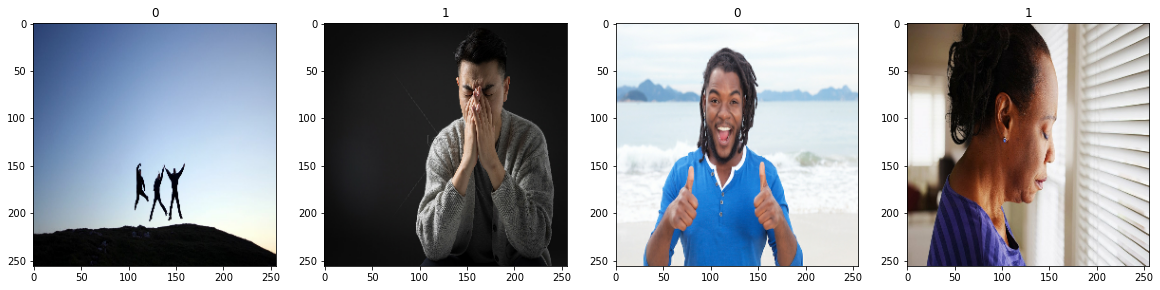

In [98]:
# Here we can see which class is assigned to which type of image(happy=0, sad=1)
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [99]:
batch[0].min()

0.0

In [100]:
batch[0].max()

255.0

In [101]:
scaled = batch[0] / 255

In [102]:
scaled.min()

0.0

In [103]:
scaled.max()

1.0

### 3. Preprocess Data
#### Scale Data

In [104]:
data = data.map(lambda x,y: (x/255,y))
# data.map allows to perform transformations as our data is being preprocessed through data pipeline.
# x->images y->target var

In [105]:
scaled_iterator = data.as_numpy_iterator()

In [106]:
batch = scaled_iterator.next()

In [107]:
batch[0].max()

1.0

In [108]:
batch[0].min()

0.0

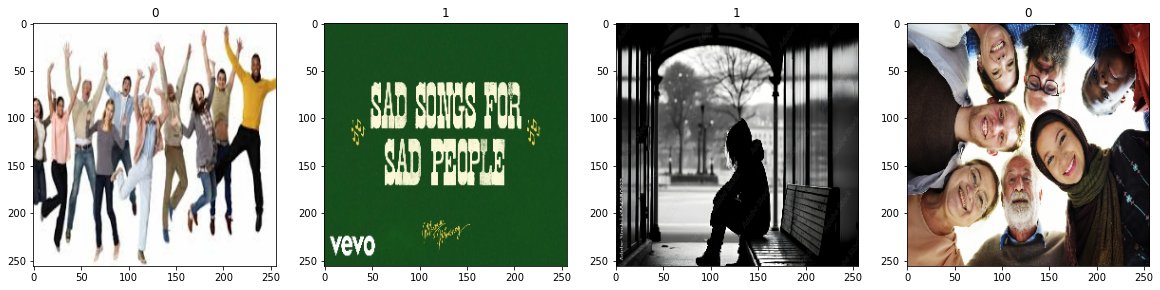

In [109]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### 4. Split the Data

In [110]:
train_size = int(len(data)*.7)  #70%    train the model
val_size = int(len(data)*.2)    #20%    evaluate the model 
test_size = int(len(data)*.1)+1 #10%

In [111]:
len(data)

5

In [112]:
train_size

3

In [113]:
val_size

1

In [114]:
test_size

1

In [115]:
train_size+val_size+test_size

5

In [116]:
train = data.take(train_size)  # take means how much data we are going to take/allocate to the training data  
val = data.skip(train_size).take(val_size) #skip the batches that are already allocated to train
test = data.skip(train_size+val_size).take(test_size)

### 5. Build the Deep Learning Model

In [117]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [118]:
model = Sequential()

In [119]:
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [120]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [121]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

### 6. Train

In [122]:
# Create a log directory
logdir = 'logs'

In [123]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [124]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])
# Fit-> training component
# Epochs-> How long we are going to train for & 1 epoch is one run over the entire training set of data

Epoch 1/20
3/3 [==============================] - 6s 2s/step - loss: 0.9621 - accuracy: 0.5625 - val_loss: 0.6454 - val_accuracy: 0.5625
Epoch 2/20
3/3 [==============================] - 4s 1s/step - loss: 0.6153 - accuracy: 0.7292 - val_loss: 0.5233 - val_accuracy: 0.6875
Epoch 3/20
3/3 [==============================] - 4s 1s/step - loss: 0.5878 - accuracy: 0.6979 - val_loss: 0.4745 - val_accuracy: 0.7500
Epoch 4/20
3/3 [==============================] - 4s 1s/step - loss: 0.4694 - accuracy: 0.7708 - val_loss: 0.4981 - val_accuracy: 0.8750
Epoch 5/20
3/3 [==============================] - 4s 1s/step - loss: 0.4612 - accuracy: 0.8854 - val_loss: 0.3473 - val_accuracy: 0.8750
Epoch 6/20
3/3 [==============================] - 4s 1s/step - loss: 0.3969 - accuracy: 0.7708 - val_loss: 0.2955 - val_accuracy: 0.9688
Epoch 7/20
3/3 [==============================] - 4s 1s/step - loss: 0.2909 - accuracy: 0.9167 - val_loss: 0.1995 - val_accuracy: 0.9375
Epoch 8/20
3/3 [=========================

### 7. Plot the Performance

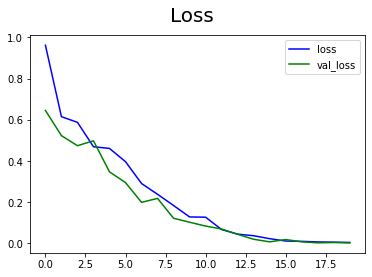

In [125]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='green', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right")
plt.show()

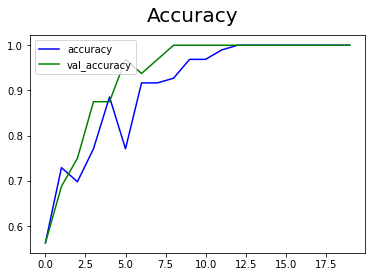

In [126]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='green', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### 8. Evaluate

In [127]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [128]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [129]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 164ms/step


In [130]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


### 9. Test

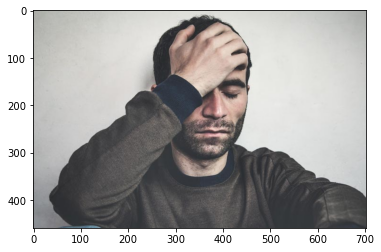

In [131]:
img = cv2.imread('sadtest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

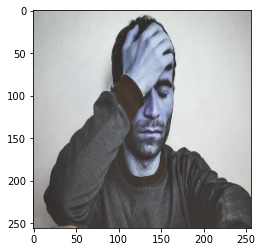

In [132]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [133]:
resize.shape

TensorShape([256, 256, 3])

In [134]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [135]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 39ms/step


In [136]:
yhat

array([[0.9988677]], dtype=float32)

In [137]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


### 10. Save the model

In [138]:
from tensorflow.keras.models import load_model

In [139]:
model.save(os.path.join('models', 'imageclassification.h5'))

In [140]:
os.path.join('models','imageclassification.h5')

'models\\imageclassification.h5'

In [141]:
new_model = load_model(os.path.join('models', 'imageclassification.h5'))

In [142]:
new_model

In [143]:
new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 116ms/step


array([[0.9988677]], dtype=float32)

In [144]:
#if yhatnew > 0.5:
#    print(f'Predicted class is Sad')
#else:
#    print(f'Predicted class is Happy')